# Credit Card Fraud Detection — End‑to‑End Project

This notebook shows my approach to building and evaluating a fraud detection model, including:
- Data understanding & cleaning
- Feature engineering
- Handling class imbalance (SMOTE / class weights)
- Model training & evaluation
- Key insights + what I would improve next

**Author:** Sachin Patel


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier, ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
    
    
  
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

from sklearn.svm import SVC

#Data Representation

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


#Data_Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Data_Description

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Data_Cleaning

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df = df.drop_duplicates()


In [8]:
df["Amount"].value_counts().nlargest(10)

Amount
1.00     13566
1.98      6044
0.89      4871
9.99      4738
15.00     3280
0.76      2977
10.00     2948
1.29      2892
1.79      2623
0.99      2304
Name: count, dtype: int64

The most frequent transaction amounts are small, commonly used values (e.g., 1.00, 9.99, 10.00), indicating recurring low-value purchases and typical pricing strategies.

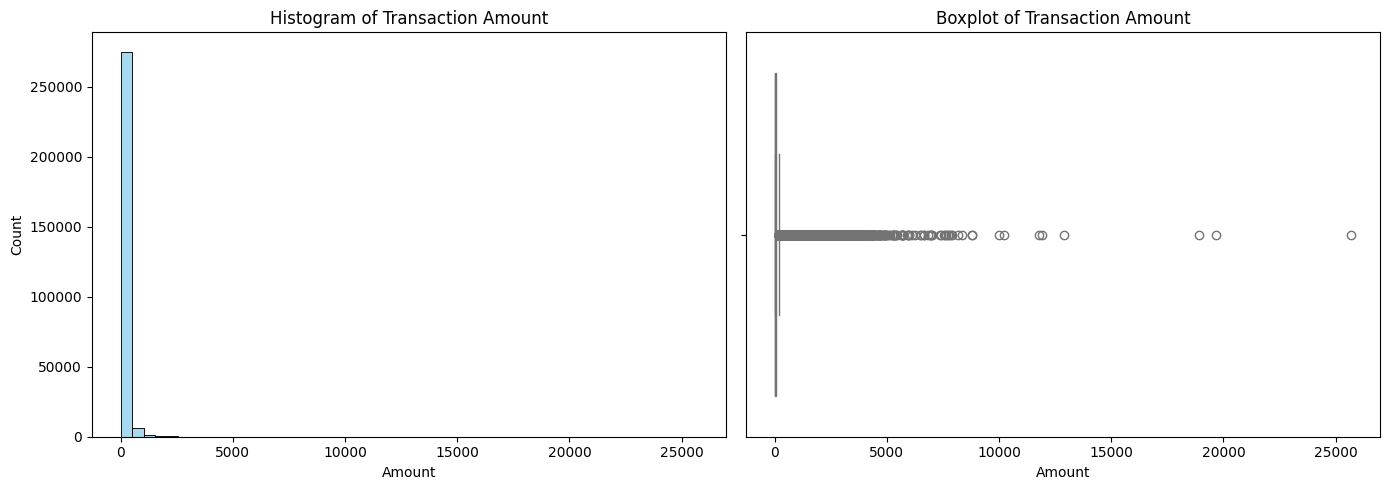

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# 1️⃣ Histogram
sns.histplot(df['Amount'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title("Histogram of Transaction Amount")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Count")

# 2️⃣ Boxplot
sns.boxplot(x=df['Amount'], ax=axes[1], color='lightgreen')
axes[1].set_title("Boxplot of Transaction Amount")
axes[1].set_xlabel("Amount")

plt.tight_layout()
plt.show()

#detect_outliers

In [10]:
q1=df["Amount"].quantile(.25)
q3=df["Amount"].quantile(.75)
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
outliers=df[(df["Amount"]>upper_bound)|(df["Amount"]<lower_bound)]
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


In [11]:
df["Time"].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

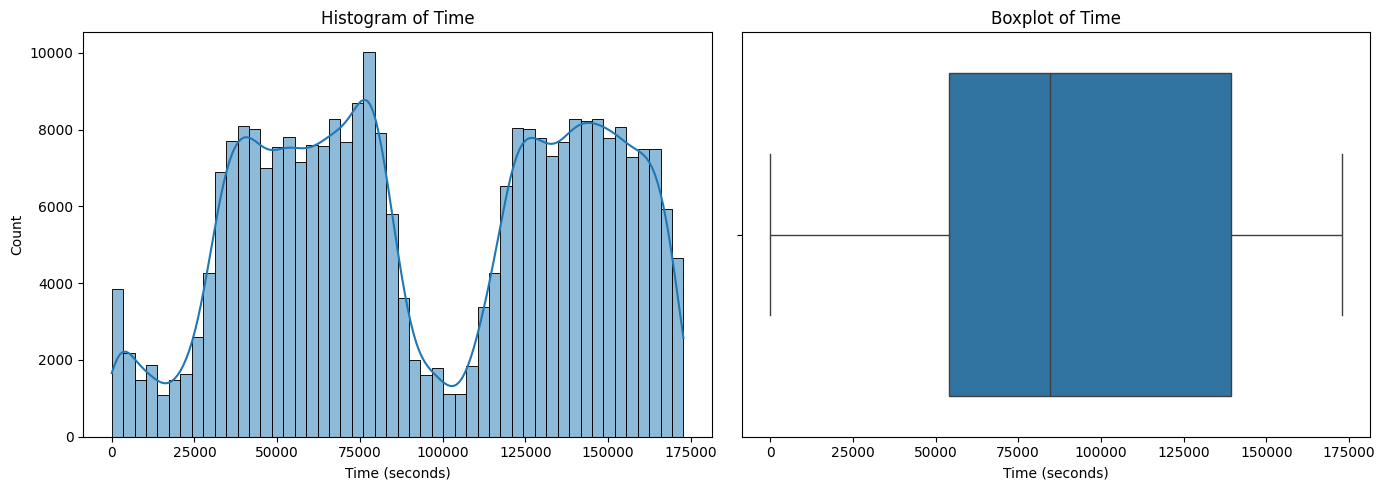

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Histogram
sns.histplot(df['Time'], bins=50, ax=axes[0],kde=True)
axes[0].set_title("Histogram of Time")
axes[0].set_xlabel("Time (seconds)")
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=df['Time'], ax=axes[1])
axes[1].set_title("Boxplot of Time")
axes[1].set_xlabel("Time (seconds)")

plt.tight_layout()
plt.show()

In [13]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

The dataset is highly imbalanced, with fraudulent transactions representing only about 0.17% of the data

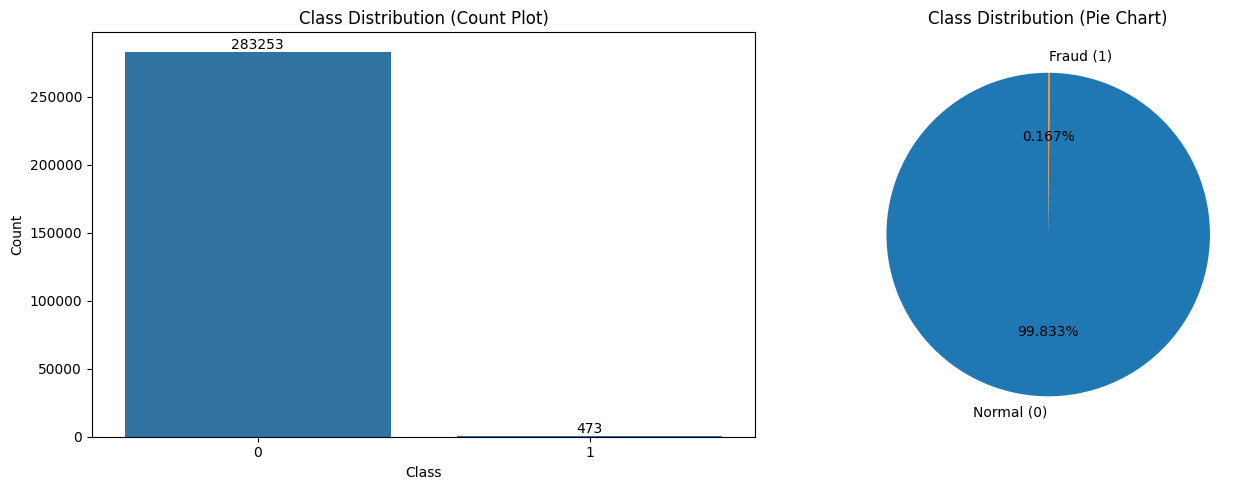

In [14]:


fig, axes = plt.subplots(1, 2, figsize=(14,5))


sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_title("Class Distribution (Count Plot)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")


for p in axes[0].patches:
    axes[0].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

# 2️⃣ Pie Chart
class_counts = df['Class'].value_counts()

axes[1].pie(
    class_counts,
    labels=['Normal (0)', 'Fraud (1)'],
    autopct='%1.3f%%',
    startangle=90,
    
)
axes[1].set_title("Class Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


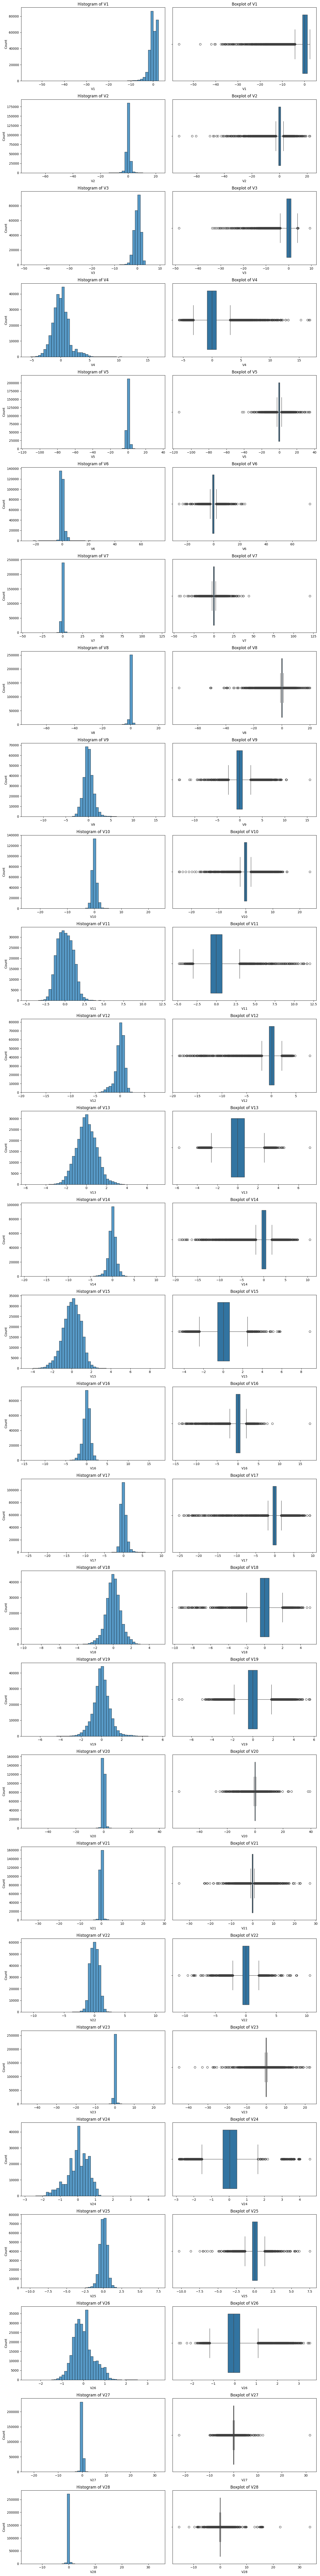

In [15]:


# اختيار أعمدة V
v_columns = [col for col in df.columns if col.startswith('V')]

# إعداد الشكل
fig, axes = plt.subplots(nrows=len(v_columns), ncols=2, figsize=(14, 4 * len(v_columns)))

for i, col in enumerate(v_columns):
    
    # Histogram
    sns.histplot(df[col], bins=50, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()


#Bivariate_Analysis

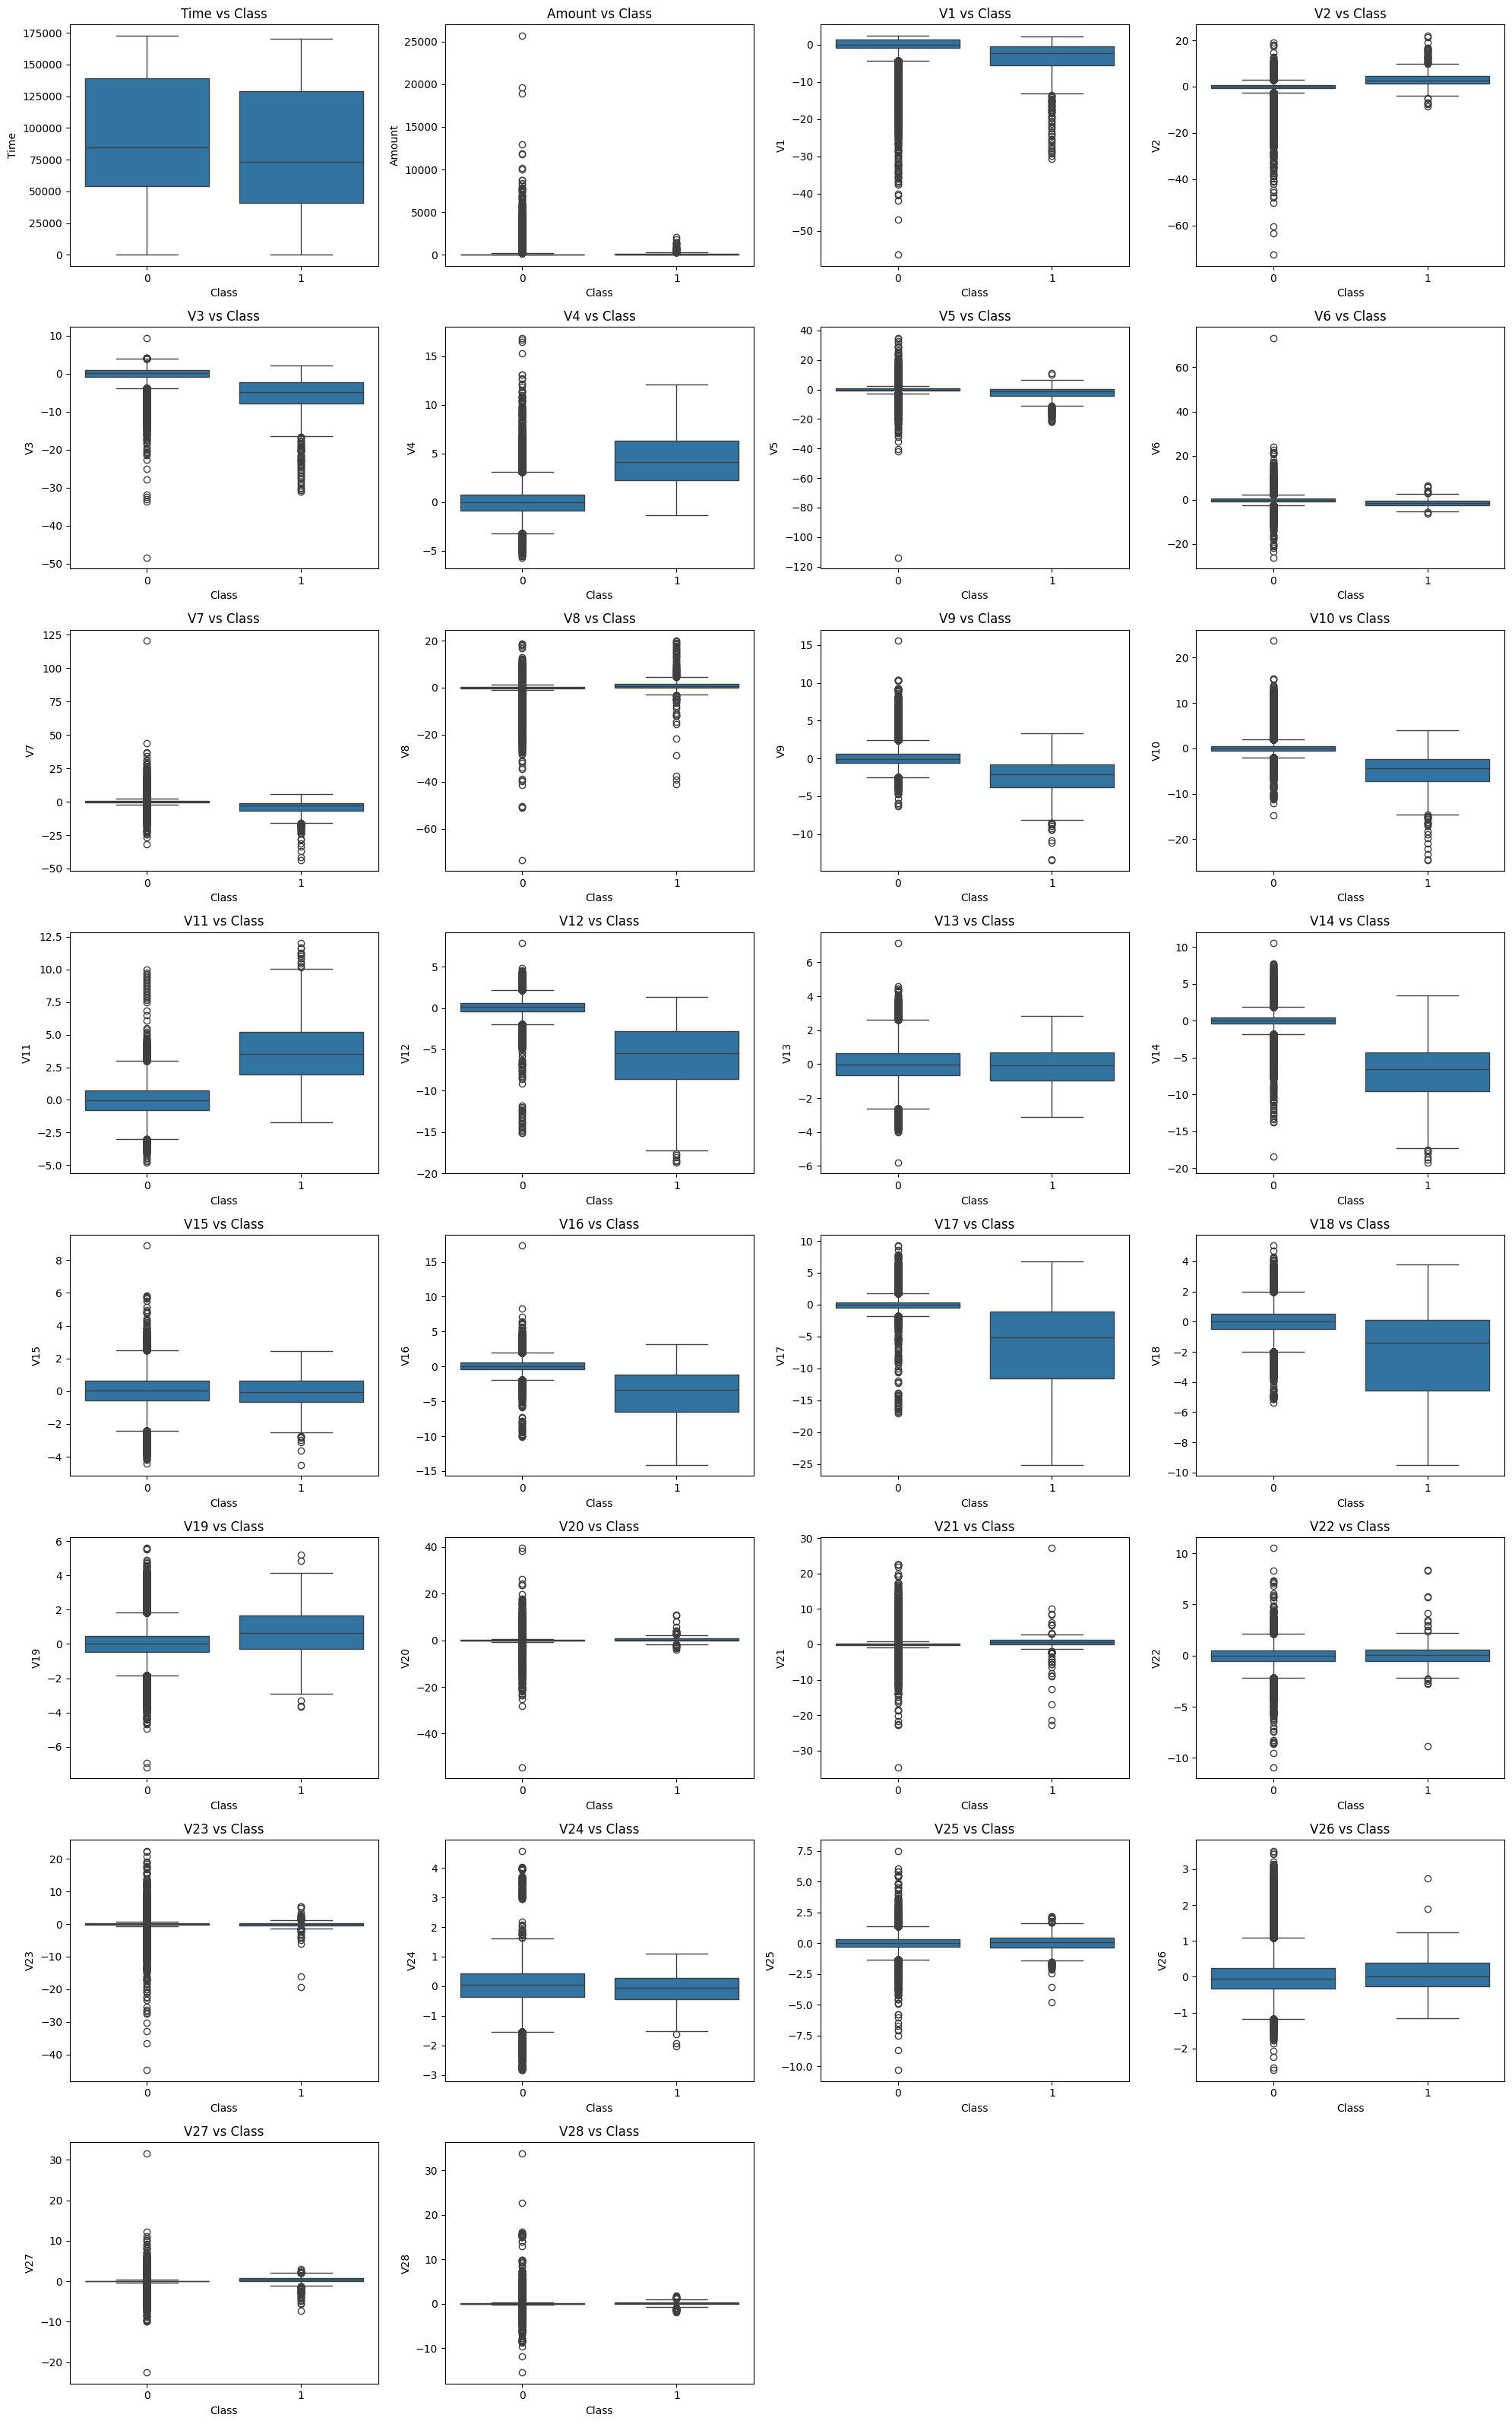

In [16]:
features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]


n_cols = 4  
n_rows = (len(features) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Class', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Class')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#data_split

In [17]:
x=df.drop("Class",axis=1)
y=df["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

#preprocessing&Model_pipeline

#LogisticRegression

In [19]:
logistic_pipe=Pipeline([
    ("scaler",RobustScaler()),("LogisticRegression",LogisticRegression(max_iter=1000,random_state=42))
])
logistic_pipe.fit(x_train_res,y_train_res)
print(logistic_pipe.score(x_train_res,y_train_res))
y_pre=logistic_pipe.predict(x_test)
print(accuracy_score(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.9766170778960004
0.9896380361611391
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.12      0.84      0.21        90

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746



#XGBClassifier

In [21]:

xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train_res, y_train_res)
y_train_pre=xgb.predict(x_train_res)
print(accuracy_score(y_train_res,y_train_pre))

y_pred_xgb = xgb.predict(x_test)

print(accuracy_score(y_test,y_pre))
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:51:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9998676063672511
0.9896380361611391
XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.75      0.81      0.78        90

    accuracy                           1.00     56746
   macro avg       0.88      0.91      0.89     56746
weighted avg       1.00      1.00      1.00     56746



#AdaBoostClassifier

In [22]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=1,
        min_samples_leaf=50
    ),
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

ada.fit(x_train_res, y_train_res)

y_pred_ada = ada.predict(x_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost ROC-AUC:", roc_auc_score(y_test, ada.predict_proba(x_test)[:,1]))
print("AdaBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


AdaBoost Accuracy: 0.9817608289571071
AdaBoost ROC-AUC: 0.9711000502055289
AdaBoost Performance:
Accuracy: 0.9817608289571071
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.07      0.88      0.13        90

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746

Confusion Matrix:
 [[55632  1024]
 [   11    79]]


#ExtraTreesClassifier

In [25]:
 
extra_model = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


extra_model.fit(x_train_res, y_train_res)
y_train_pre=extra_model.predict(x_train_res)


y_pred_extra = extra_model.predict(x_test)


print("Extra Trees Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_extra))
print("Acc_train",accuracy_score(y_train_res,y_train_pre))
print(classification_report(y_test, y_pred_extra))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_extra))

Extra Trees Performance:
Accuracy: 0.9995770627004547
Acc_train 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.78      0.85        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56652     4]
 [   20    70]]


#CatBoostClassifier

In [29]:

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=5,
    eval_metric='F1',
    random_seed=42,
    verbose=100
)


cat_model.fit(x_train_res, y_train_res)


y_pred_cat = cat_model.predict(x_test)


print("CatBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))


0:	learn: 0.9618218	total: 84.7ms	remaining: 1m 24s
100:	learn: 0.9965609	total: 6.85s	remaining: 1m
200:	learn: 0.9994508	total: 13.6s	remaining: 53.9s
300:	learn: 0.9997088	total: 19.9s	remaining: 46.3s
400:	learn: 0.9997772	total: 26s	remaining: 38.9s
500:	learn: 0.9997838	total: 31.8s	remaining: 31.6s
600:	learn: 0.9997838	total: 37.5s	remaining: 24.9s
700:	learn: 0.9997838	total: 43.3s	remaining: 18.5s
800:	learn: 0.9997992	total: 48.8s	remaining: 12.1s
900:	learn: 0.9997992	total: 54s	remaining: 5.93s
999:	learn: 0.9997992	total: 59.1s	remaining: 0us
CatBoost Performance:
Accuracy: 0.9991188806259472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.81      0.74        90

    accuracy                           1.00     56746
   macro avg       0.84      0.91      0.87     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56623    33]
 [   17    73]]


Comparison of Models on Class 1 (Fraud):
                 Model  Precision_1  Recall_1  F1_1
0  Logistic Regression         0.12      0.84  0.21
1              XGBoost         0.75      0.81  0.78
2          Extra Trees         0.95      0.78  0.85
3             CatBoost         0.69      0.81  0.74


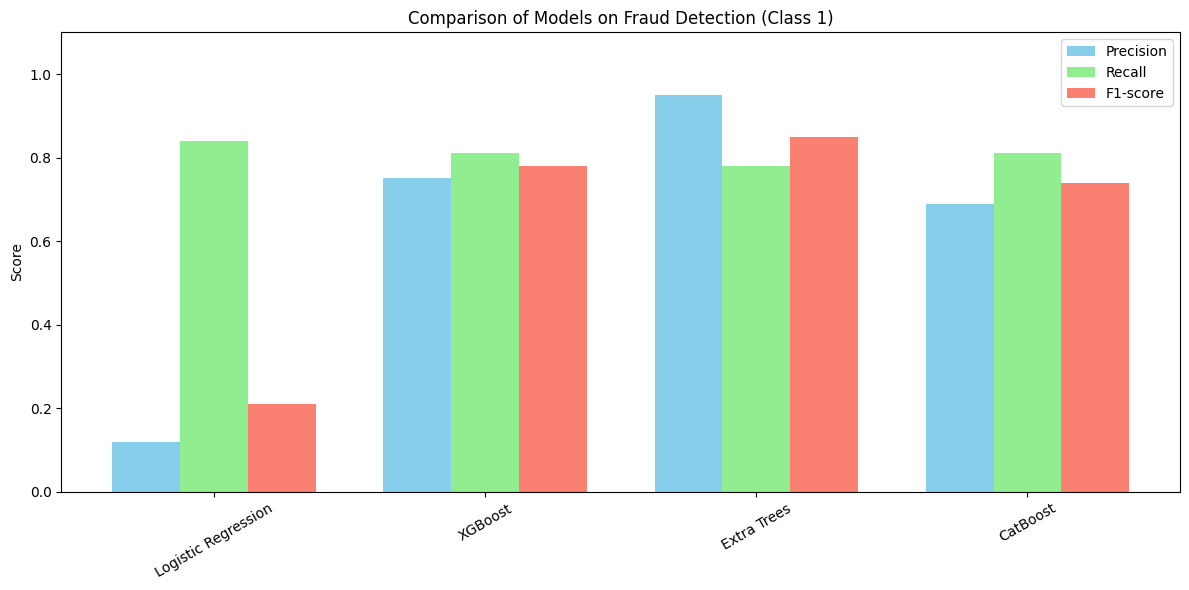

In [31]:

results = {
    "Model": ["Logistic Regression", "XGBoost", "Extra Trees", "CatBoost"],
    "Precision_1": [0.12,  0.75, 0.95, 0.69],
    "Recall_1":    [0.84,  0.81, 0.78, 0.81],
    "F1_1":        [0.21,  0.78, 0.85, 0.74]
}

df_results = pd.DataFrame(results)


print("Comparison of Models on Class 1 (Fraud):")
print(df_results)


fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25
index = range(len(df_results))

ax.bar([i - bar_width for i in index], df_results['Precision_1'], width=bar_width, label='Precision', color='skyblue')
ax.bar(index, df_results['Recall_1'], width=bar_width, label='Recall', color='lightgreen')
ax.bar([i + bar_width for i in index], df_results['F1_1'], width=bar_width, label='F1-score', color='salmon')

ax.set_xticks(index)
ax.set_xticklabels(df_results['Model'], rotation=30)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.set_title('Comparison of Models on Fraud Detection (Class 1)')
ax.legend()

plt.tight_layout()
plt.show()


📌 Conclusion

SMOTE was applied to balance the dataset before training.

Multiple models were evaluated: Logistic Regression, RandomForest, SVM, XGBoost, Extra Trees, and CatBoost.

Extra Trees achieved the highest Precision for fraud detection, minimizing false positives.

XGBoost provided the best balance between Precision and Recall.

CatBoost achieved high Recall, detecting most fraudulent transactions.

Logistic Regression and RandomForest showed lower performance on fraud detection.

Key takeaway:

Extra Trees and XGBoost are the most robust models for detecting credit card fraud in highly imbalanced datasets, without the need for additional preprocessing.